**Goal**: test the simple programs to be used in the test suite.

# CodeQL Test WorkBench

In [1]:
import project_path
from rdlib import *  # this imports the base libraries

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# create the subcircuit
qreg = QuantumRegister(3)
creg = ClassicalRegister(3)
qc_subcircuit = QuantumCircuit(qreg, creg)
qc_subcircuit.h(0)

# create the main circuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc_macro = QuantumCircuit()
qc_macro.add_register(q)
qc_macro.add_register(c)
qc_macro.z(0)

# compose the two with the compose method
qc_macro.compose(qc_subcircuit, qubits=q, clbits=c, inplace=True)
qc_macro.compose(qc_macro, qubits=q, clbits=c)
qc_macro.draw()


┌───┐┌───┐
q25_0: ┤ Z ├┤ H ├
       └───┘└───┘
q25_1: ──────────
                 
q25_2: ──────────
                 
c25_0: ══════════
                 
c25_1: ══════════
                 
c25_2: ══════════

In [18]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qc_subcircuit = QuantumCircuit(5, 5)
qc_subcircuit.h(0)
qc_macro = QuantumCircuit(4, 4)
qc_macro.z(2)
qc_macro.compose(qc_subcircuit, inplace=True)
qc_macro.draw()


CircuitError: "Trying to compose with another QuantumCircuit which has more 'in' edges."

In [21]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qc_subcircuit = QuantumCircuit(3, 3)
qc_subcircuit.h(0)  # first added gate
qc_macro = QuantumCircuit(4, 4)
qc_macro.z(2)  # second added gate
qc_macro.compose(qc_subcircuit)  # ghost addition
n_gates = len(qc_macro.data)
print(n_gates)  # returns 1 instead of 2

1


In [49]:
# create a U3 gate
from qiskit.circuit.library.standard_gates import U3Gate
complex_gate = U3Gate(2, 3, 1)

     ┌───┐         ░ ┌─────────┐┌─┐   
q_0: ┤ H ├──■──────░─┤0        ├┤M├───
     └───┘┌─┴─┐┌─┐ ░ │         │└╥┘   
q_1: ─────┤ X ├┤M├─░─┤  Ryy(1) ├─╫────
          └───┘└╥┘ ░ │         │ ║ ┌─┐
q_2: ───────────╫──░─┤1        ├─╫─┤M├
                ║  ░ └─────────┘ ║ └╥┘
c_0: ═══════════╬════════════════╩══╬═
                ║                   ║ 
c_1: ═══════════╩═══════════════════╬═
                                    ║ 
c_2: ═══════════════════════════════╩═
                                      


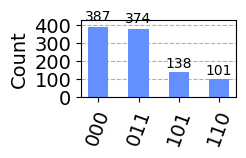

In [58]:
# entanglement disruption
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qc = QuantumCircuit(3,3)
# create entanglement between qubits 0 and 1
qc.h(0)
qc.cx(0, 1)

# perform a measurement on qubit 1
qc.measure(1, 1)
qc.barrier()
# apply a CNOT gate with qubit 1 as control and qubit 2 as target
qc.ryy(1, 0, 2)

# perform another measurement on qubit 0
qc.measure(0, 0)
qc.measure(2, 2)
print(qc.draw())
# execute and plot qc
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts, figsize=(2,1))


     ┌───┐     ┌─────────┐   ┌─┐   
q_0: ┤ H ├──■──┤0        ├───┤M├───
     └───┘┌─┴─┐│         │┌─┐└╥┘   
q_1: ─────┤ X ├┤  Ryy(1) ├┤M├─╫────
          └───┘│         │└╥┘ ║ ┌─┐
q_2: ──────────┤1        ├─╫──╫─┤M├
               └─────────┘ ║  ║ └╥┘
c_0: ══════════════════════╬══╩══╬═
                           ║     ║ 
c_1: ══════════════════════╩═════╬═
                                 ║ 
c_2: ════════════════════════════╩═
                                   


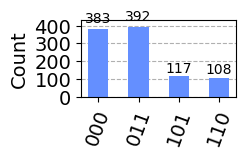

In [59]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qc = QuantumCircuit(3,3)
# create entanglement between qubits 0 and 1
qc.h(0)
qc.cx(0, 1)

# apply a CNOT gate with qubit 1 as control and qubit 2 as target
qc.ryy(1, 0, 2)

# perform a measurement on qubit 1
qc.measure(1, 1)

# perform another measurement on qubit 0
qc.measure(0, 0)
qc.measure(2, 2)

print(qc.draw())
# execute and plot qc
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts, figsize=(2,1))

### Entangelment Example in ScaffCC paper


     ┌───┐                                                           
q_0: ┤ H ├──■────────────────────────────■───────────────────────────
     └───┘┌─┴─┐                        ┌─┴─┐                         
q_1: ─────┤ X ├──■────────────■────────┤ X ├─────────────────────────
          └───┘┌─┴─┐        ┌─┴─┐      └───┘                         
q_2: ──────────┤ X ├──■─────┤ X ├────────────────────────────────────
               └───┘┌─┴─┐┌──┴───┴──┐┌─────────┐┌─────────┐┌─────────┐
q_3: ───────────────┤ X ├┤ Rx(0.5) ├┤ Rx(0.5) ├┤ Rx(0.5) ├┤ Rx(0.5) ├
                    └───┘└─────────┘└─────────┘└─────────┘└─────────┘


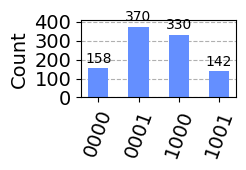

In [19]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library.standard_gates import *
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(4)
qc.h(0)
qc.cnot(0, 1)
qc.cnot(1, 2)
qc.cnot(2, 3)
# qc.append(CXGate().inverse(), [2, 3])
qc.append(CXGate().inverse(), [1, 2])
qc.append(CXGate().inverse(), [0, 1])
qc.rx(0.5, 3)
qc.rx(0.5, 3)
qc.rx(0.5, 3)
qc.rx(0.5, 3)
print(qc.draw())
qc.barrier()
qc.add_register(ClassicalRegister(4))
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000).result().get_counts()
# first digit of the string is the bit with the largest index in the register
plot_histogram(counts, figsize=(2,1))

In [23]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
circuit = QuantumCircuit(qr,cr)
circuit.h(qr)


circuit.measure_all()


backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=1, memory=True).result()
counts = result.get_memory()
num = counts[0].split(" ")[0]
print(counts)
result.get_counts()

['00101 00000']


{'00101 00000': 1}

In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import XGate, YGate, ZGate, HGate, SGate, SdgGate, TGate, TdgGate, RXGate, RYGate, RZGate, U1Gate, U2Gate, U3Gate, CXGate, CYGate, CZGate, CHGate, CRZGate, CU1Gate, CU3Gate, SwapGate, CCXGate, CSwapGate, RXXGate, RYYGate, RZZGate, RZXGate, RZZGate, Measure

qreg = QuantumRegister(8)
creg = ClassicalRegister(8)
qc = QuantumCircuit(qreg, creg)

# add as attribute of the circuit
qc.x(0)
qc.y(1)
qc.z(2)
qc.h(3)
qc.s(4)
qc.sdg(5)
qc.t(6)
qc.tdg(7)
qc.rx(theta=0.1, qubit=0)
qc.ry(theta=0.1, qubit=1)
qc.rz(phi=0.1, qubit=2)
qc.u1(theta=0.1, qubit=3)
qc.p(theta=0.1, qubit=4)
qc.u2(phi=0.1, lam=0.2, qubit=4)
qc.u(theta=0.1, phi=0.1, lam=0.2, qubit=5)
qc.u3(theta=0.1, phi=0.1, lam=0.2, qubit=5)
qc.cx(qreg[0], qreg[1])
qc.cy(qreg[1], qreg[2])
qc.cz(qreg[2], qreg[3])
qc.ch(control_qubit=qreg[3], target_qubit=qreg[4])
qc.crz(theta=0.1, control_qubit=qreg[4], target_qubit=qreg[5])
qc.cu1(theta=0.1, control_qubit=qreg[5], target_qubit=qreg[6])
qc.cp(theta=0.1, control_qubit=qreg[6], target_qubit=qreg[7])
qc.cu3(theta=0.1, phi=0.1, lam=0.2, control_qubit=qreg[6], target_qubit=qreg[7])
qc.cu(theta=0.1, phi=0.1, lam=0.2, gamma=0.4, control_qubit=qreg[6], target_qubit=qreg[7])
qc.swap(0, 1)
qc.ccx(0, 1, 2)
qc.cswap(0, 1, 2)
qc.rxx(theta=0.1, qubit1=0, qubit2=1)
qc.ryy(theta=0.1, qubit1=1, qubit2=2)
qc.rzz(theta=0.1, qubit1=2, qubit2=3)
qc.rzx(theta=0.1, qubit1=3, qubit2=4)
qc.rzz(0.1, 4, 5)
qc.measure(qreg[0], creg[0])
qc.measure_all()

# add with append
qc.append(XGate(), qargs=[0])
qc.append(YGate(), qargs=[1])
qc.append(ZGate(), qargs=[2])
qc.append(HGate(), qargs=[3])
qc.append(SGate(), qargs=[4])
qc.append(SdgGate(), qargs=[5])
qc.append(TGate(), qargs=[6])
qc.append(TdgGate(), qargs=[7])
qc.append(RXGate(theta=0.1), qargs=[0])
qc.append(RYGate(theta=0.1), [1])
qc.append(RZGate(phi=0.1), [2])
qc.append(U1Gate(theta=0.1), [3])
qc.append(U2Gate(phi=0.1, lam=0.2), [4])
qc.append(U3Gate(theta=0.1, phi=0.1, lam=0.2), [5])
qc.append(CXGate(), qargs=[qreg[0], qreg[1]])
qc.append(CYGate(), qargs=[qreg[1], qreg[2]])
qc.append(CZGate(), qargs=[qreg[2], qreg[3]])
qc.append(CHGate(), qargs=[3, 4])
qc.append(instruction=CRZGate(theta=0.1), qargs=[qreg[4], qreg[5]])
qc.append(instruction=CU1Gate(theta=0.1), qargs=[qreg[5], qreg[6]])
qc.append(CU3Gate(0.1, 0.1, 0.2), qargs=[6, 7])
qc.append(SwapGate(), qargs=[0, 1])
qc.append(CCXGate(), qargs=[0, 1, 2])
qc.append(CSwapGate(), qargs=[0, 1, 2])
qc.append(RXXGate(theta=0.1), qargs=[0, 1])
qc.append(RYYGate(theta=0.1), qargs=[1, 2])
qc.append(RZZGate(theta=0.1), qargs=[2, 3])
qc.append(RZXGate(theta=0.1), qargs=[3, 4])
qc.append(RZZGate(theta=0.1), qargs=[4, 5])
qc.append(Measure(), qargs=[0], cargs=[creg[0]])

print(qc.draw())

         ┌───┐    ┌─────────┐                                               »
  q7_0: ─┤ X ├────┤ Rx(0.1) ├─────────────■───────────────X───■───────■─────»
         ├───┤    ├─────────┤           ┌─┴─┐             │   │       │     »
  q7_1: ─┤ Y ├────┤ Ry(0.1) ├───────────┤ X ├─────────■───X───■───────X─────»
         ├───┤    ├─────────┤           └───┘       ┌─┴─┐   ┌─┴─┐     │     »
  q7_2: ─┤ Z ├────┤ Rz(0.1) ├───────────────────────┤ Y ├─■─┤ X ├─────X─────»
         ├───┤    ├─────────┤                       └───┘ │ └───┘           »
  q7_3: ─┤ H ├────┤ U1(0.1) ├─────────────────────────────■───■─────────────»
         ├───┤    └┬────────┤      ┌─────────────┐          ┌─┴─┐           »
  q7_4: ─┤ S ├─────┤ P(0.1) ├──────┤ U2(0.1,0.2) ├──────────┤ H ├─────■─────»
        ┌┴───┴┐┌───┴────────┴───┐┌─┴─────────────┴─┐        └───┘┌────┴────┐»
  q7_5: ┤ Sdg ├┤ U(0.1,0.1,0.2) ├┤ U3(0.1,0.1,0.2) ├─────────────┤ Rz(0.1) ├»
        └┬───┬┘└────────────────┘└─────────────────┘            

/tmp/ipykernel_11939/2687055310.py:20: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  qc.u1(theta=0.1, qubit=3)
/tmp/ipykernel_11939/2687055310.py:22: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  qc.u2(phi=0.1, lam=0.2, qubit=4)
/tmp/ipykernel_11939/2687055310.py:24: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, y

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer

# last piece of the circuit
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.rx(0.1, q[3])

# first piece of the circuit
qc_front = QuantumCircuit(4,4)
qc_front.s(0)
qc_front.cx(0, 1)
qc_front.cx(1, 2)
qc_front.cx(2, 3)
qc_front.t(3)
qc_front.barrier()
qc_complete = qc_front.compose(
    qc,
    qubits=[0, 1, 2, 3],
    clbits=[0, 1, 2, 3],
)
qc_complete.draw()

┌───┐                     ░    ┌───┐        
q_0: ┤ S ├──■──────────────────░────┤ H ├─────■──
     └───┘┌─┴─┐                ░    └───┘   ┌─┴─┐
q_1: ─────┤ X ├──■─────────────░────────────┤ X ├
          └───┘┌─┴─┐           ░            └───┘
q_2: ──────────┤ X ├──■────────░─────────────────
               └───┘┌─┴─┐┌───┐ ░ ┌─────────┐     
q_3: ───────────────┤ X ├┤ T ├─░─┤ Rx(0.1) ├─────
                    └───┘└───┘ ░ └─────────┘     
c_0: ════════════════════════════════════════════
                                                 
c_1: ════════════════════════════════════════════
                                                 
c_2: ════════════════════════════════════════════
                                                 
c_3: ════════════════════════════════════════════

## True Positives

In [1]:
# ghost composition
# data/datasets/exp_v06/codeql/src.zip/home/paltenmo/projects/qlint/data/datasets/exp_v06/files_selected/test_mc_gate_13ba80.py
def test_linear_toffoli0(self):
    """ Testing Toffoli control 000"""
    gate_x = np.array([[0, 1], [1, 0]])
    circuit2 = qiskit.QuantumCircuit(4)
    state1 = qclib.util.get_state(circuit2)
    circuit = qiskit.QuantumCircuit(4)
    mc_gate(gate_x, circuit, [1, 2, 3], 0)
    circuit.compose(circuit2, circuit.qubits)
    state2 = qclib.util.get_state(circuit)
    self.assertTrue(np.allclose(state1, state2))

def test_linear_toffoli2(self):
    """ Testing Toffoli control 110"""
    gate_x = np.array([[0, 1], [1, 0]])

    circuit2 = qiskit.QuantumCircuit(4)
    circuit2.x(2)
    circuit2.x(3)
    circuit2.x(0)
    state1 = qclib.util.get_state(circuit2)

    circuit = qiskit.QuantumCircuit(4)
    mc_gate(gate_x, circuit, [3, 2, 1], 0)

    circuit2.compose(circuit, circuit2.qubits)
    state2 = qclib.util.get_state(circuit2)

    self.assertTrue(np.allclose(state1, state2))

In [4]:
# op after measurement
# the use wanted to implement the OR but they forgot to reinitialize the circuit
# and this is captured by our pattern, since a measurement appear before the 
# gate starting from the second iteration.
# data/datasets/exp_v06/files_selected/or_with_qubits_17fe47.py
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, execute


# Define quantum circuit
qc = QuantumCircuit(3,1)

for input in ['00', '01', '10', '11']:

    # Initialise all qubits to ket 0 to make life easy
    if input[0] == '1':
        qc.x(0)
    if input[1] == '1':
        qc.x(1)

    qc.cx(0,2)
    qc.cx(1,2)
    qc.ccx(0,1,2)

    qc.measure(2,0)
    
    qc.barrier()  #NOT IN THE CODE
    print(qc.draw()) ## NOT IN THE CODE

    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    print("Input:", input, "Output:", counts)

                        ░ 
q_0: ──■─────────■──────░─
       │         │      ░ 
q_1: ──┼────■────■──────░─
     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┐ ░ 
q_2: ┤ X ├┤ X ├┤ X ├┤M├─░─
     └───┘└───┘└───┘└╥┘ ░ 
  c: ════════════════╩════
                          
Input: 00 Output: {'0': 1000}
                             ░ 
q_0: ───────■─────────■──────░─
     ┌───┐  │         │      ░ 
q_1: ┤ X ├──┼────■────■──────░─
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┐ ░ 
q_2: ─────┤ X ├┤ X ├┤ X ├┤M├─░─
          └───┘└───┘└───┘└╥┘ ░ 
  c: ═════════════════════╩════
                               
Input: 01 Output: {'1': 1000}
     ┌───┐                   ░ 
q_0: ┤ X ├──■─────────■──────░─
     └───┘  │         │      ░ 
q_1: ───────┼────■────■──────░─
          ┌─┴─┐┌─┴─┐┌─┴─┐┌─┐ ░ 
q_2: ─────┤ X ├┤ X ├┤ X ├┤M├─░─
          └───┘└───┘└───┘└╥┘ ░ 
  c: ═════════════════════╩════
                               
Input: 10 Output: {'1': 1000}
     ┌───┐                   ░ 
q_0: ┤ X ├──■─────────■──────░─
     ├───┤  │         │    

## Tests

In [2]:
# https://github.com/sqrta/Qsketch/blob/ffdfbe309e6d18f562d4e2cab968c45cfee68ba1/Qiskit_wstate.py
from qiskit import QuantumCircuit
from qiskit.circuit.library.standard_gates import HGate

circ = QuantumCircuit(3)

# Spec { 'qubit':2, 'initial': |00> } 
circ.__1(__, 0)
circ.draw()

AttributeError: 'QuantumCircuit' object has no attribute '__1'

In [15]:
# https://github.com/beaudoco/qiskit-shifting-simulator/blob/5348151514ed2c60619b813b7b0eaad693fd8e59/circuits/circuit_0_5.py

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer

qr = QuantumRegister(5, 'q')
cr = ClassicalRegister(2, 'c')
qc_5_close = QuantumCircuit(qr, cr)

qc_extra = QuantumCircuit(qr, cr)

num_gates = 3 
for i in range(num_gates):    
    qc_5_close.cx(qr[0], qr[1])
    qc_5_close.cx(qr[3], qr[4])
    qc_5_close.barrier()
qc_extra.h(0)
qc_extra.h(1)
qc_extra.h(2)
qc_extra.measure(qr[0], cr[0])

qc_5_close.measure(qr[0], cr[0])
qc_5_close.measure(qr[1], cr[1])
print(qc_5_close.draw())

print(qc_extra.draw())
max_experiments = 2
circ_list = []
backend = Aer.get_backend('qasm_simulator')
circ_list.append(qc_extra)
for i in range(max_experiments):
    circ_list.append(qc_5_close)
job = execute(circ_list, backend, shots=8192)
result = job.result()
for i in range(max_experiments + 1):
    print(result.get_counts(i))

           ░       ░       ░ ┌─┐   
q_0: ──■───░───■───░───■───░─┤M├───
     ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░ └╥┘┌─┐
q_1: ┤ X ├─░─┤ X ├─░─┤ X ├─░──╫─┤M├
     └───┘ ░ └───┘ ░ └───┘ ░  ║ └╥┘
q_2: ──────░───────░───────░──╫──╫─
           ░       ░       ░  ║  ║ 
q_3: ──■───░───■───░───■───░──╫──╫─
     ┌─┴─┐ ░ ┌─┴─┐ ░ ┌─┴─┐ ░  ║  ║ 
q_4: ┤ X ├─░─┤ X ├─░─┤ X ├─░──╫──╫─
     └───┘ ░ └───┘ ░ └───┘ ░  ║  ║ 
c_0: ═════════════════════════╩══╬═
                                 ║ 
c_1: ════════════════════════════╩═
                                   
     ┌───┐┌─┐
q_0: ┤ H ├┤M├
     ├───┤└╥┘
q_1: ┤ H ├─╫─
     ├───┤ ║ 
q_2: ┤ H ├─╫─
     └───┘ ║ 
q_3: ──────╫─
           ║ 
q_4: ──────╫─
           ║ 
c_0: ══════╩═
             
c_1: ════════
             
{'00': 4108, '01': 4084}
{'00': 8192}
{'00': 8192}


In [6]:
# https://github.com/sungmin-net/Qiskit_Tutorials/blob/579df0293d478e197bcaa579855aa6971354359f/tutorial03_QuantumOperations.py
import matplotlib.pyplot as plt
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

from qiskit.visualization import plot_bloch_multivector # added
backend = BasicAer.get_backend('unitary_simulator')

q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.u(pi / 2, pi / 2, 0, q)
qc.draw('mpl')
plt.show()
plot_bloch_multivector(qc)
plt.show()
job = execute(qc, backend)
print(job.result().get_unitary(qc, decimals = 3))

[[ 0.707+0.j    -0.707+0.j   ]
 [ 0.   +0.707j  0.   +0.707j]]
